In [1]:
import os
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model

In [2]:
tamano=(640, 480)
modelo=os.getcwd()+'/Modelo/leucemiamodel.h5'
pesos=os.getcwd()+'/Modelo/leucemiapesos.h5'
model=load_model(modelo)
model.load_weights(pesos)

In [30]:
ruta_sanas = os.getcwd()+'/Data/Validacion/sanas/'
archivos_sanas = os.listdir(ruta_sanas)
ruta_leu = os.getcwd()+'/Data/Validacion/leucemia/'
archivos_leu =  os.listdir(ruta_leu)
y_test = []
for i in range(0,12):
    y_test.append(1)
for i in range(0,12):
    y_test.append(0)

24


In [26]:
result1 = []
probas = []
for i in archivos_sanas:
    file1=ruta_sanas+i
    x = load_img(file1, target_size=tamano)
    x = img_to_array(x)
    x = np.expand_dims(x, axis=0)
    array = model.predict(x)
    prooba = model.predict_proba(x)
    probas.append(prooba[0][0])
    result = array[0][0]
    result1.append(result)
    if result == 0:
        print("pred: Leucemia")
    else:
        print("pred: Sanas")
for i in archivos_leu:
    file1=ruta_leu+i
    x = load_img(file1, target_size=tamano)
    x = img_to_array(x)
    x = np.expand_dims(x, axis=0)
    array = model.predict(x)
    prooba = model.predict_proba(x)
    probas.append(prooba[0][0])
    result = array[0][0]
    result1.append(result)
    if result == 0:
        print("pred: Leucemia")
    else:
        print("pred: Sanas")
print(result1)
print(probas)

pred: Sanas
pred: Sanas
pred: Sanas
pred: Sanas
pred: Sanas
pred: Sanas
pred: Sanas
pred: Sanas
pred: Sanas
pred: Sanas
pred: Sanas
pred: Sanas
pred: Leucemia
pred: Leucemia
pred: Leucemia
pred: Leucemia
pred: Leucemia
pred: Leucemia
pred: Leucemia
pred: Leucemia
pred: Leucemia
pred: Leucemia
pred: Leucemia
pred: Leucemia
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [31]:
#dibujar mapas de calor
import seaborn as sns
#importamos lo de matriz de confusion la exactitud de un clasificador 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

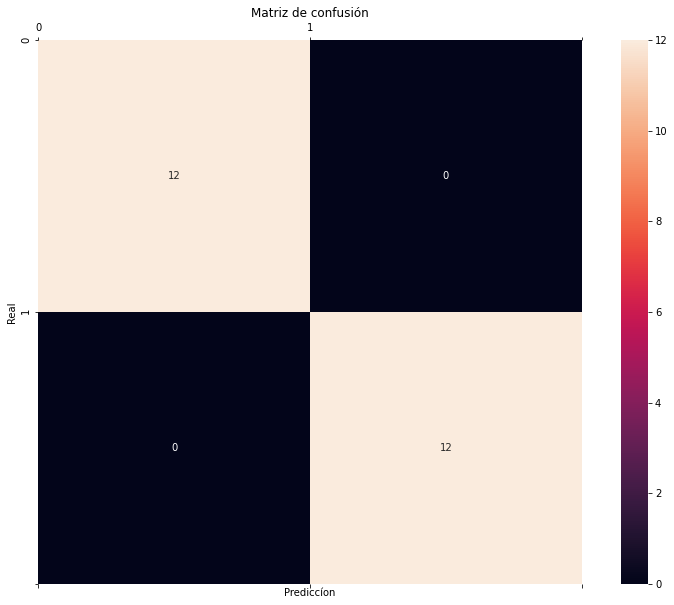

In [35]:
fig = plt.figure(1,figsize=(14,10))
ax = fig.add_subplot(1,1,1)
sns.heatmap(confusion_matrix(y_test, result1), annot=True,fmt='d' , ax = ax); #annot=True to annotate cells
cax = ax.matshow(confusion_matrix(y_test, result1))
plt.title('Matriz de confusión')
plt.xlabel('Prediccíon')
plt.ylabel('Real')
plt.savefig("matrix_leuce.png")
plt.show()

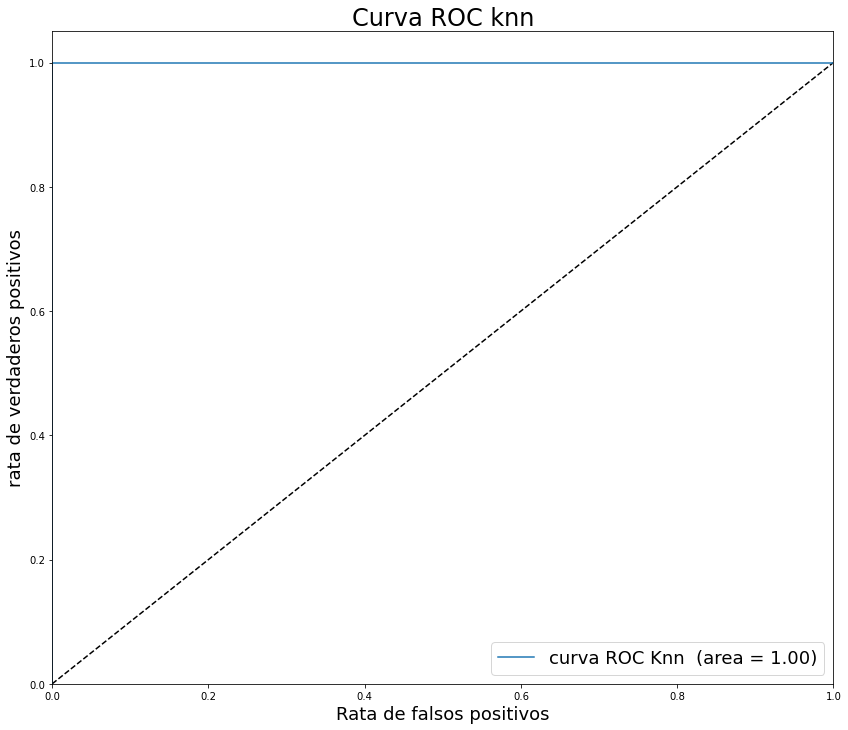

In [36]:
plt.figure(figsize=(14,12))
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Curva ROC knn", fontsize=24)
fpr, tpr, thresholds = roc_curve(y_test, probas)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='curva ROC Knn  (area = %0.2f)' % roc_auc)
#plt.title('Curva ROC para el clasificador {}'.format(classifer[i-1]))
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Rata de falsos positivos', fontsize=18)
plt.ylabel('rata de verdaderos positivos', fontsize=18)
plt.legend(fontsize=18)
plt.savefig("roc_leu.png")
plt.show()